# Iterative Solvers

Problem 1

In [30]:
import numpy as np
from matplotlib import pyplot as plt

In [57]:
def jacobiIter(A, b, tol, maxiters, plot = False):
    x_0 = np.zeros(b.shape)
    D = np.diagonal(A)
    k = 0
    dist = tol + 1
    errors = [np.linalg.norm(b)]
    while k < maxiters and dist > tol:
        x_1 = x_0 + (b - A @ x_0)/D
        dist = np.linalg.norm(x_1 - x_0)
        errors.append(np.linalg.norm(A @ x_1 - b))
        x_0 = x_1
        k += 1
    if k < maxiters:
        print('Succesfully converged to ',x_0)
    if plot:
        plt.semilogy(range(k+1),errors)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Jacobi Method')
        plt.show()
    return x_0

In [58]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
    n (int): The dimension of the system.
    num_entries (int): The number of nonzero values.
    Defaults to n^(3/2)-n.
    Returns:
    A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [62]:
n = 6
b = np.random.random(n)
A = diag_dom(n)
x = jacobiIter(A, b, tol = 1e-6,maxiters = 30)
np.allclose(A @ x, b)

Succesfully converged to  [ 0.23274711  0.41957273  0.6080063  -0.27969701  0.67202043  0.10809756]


True

Problem 2

In [49]:
def jacobiIter(A, b, tol, maxiters, plot = False):
    x_0 = np.zeros(b.shape)
    D = np.diagonal(A)
    k = 0
    dist = tol + 1
    errors = [np.linalg.norm(b)]
    while k < maxiters and dist > tol:
        x_1 = x_0 + (b - A @ x_0)/D
        dist = np.linalg.norm(x_1 - x_0)
        errors.append(np.linalg.norm(A @ x_1 - b))
        x_0 = x_1
        k += 1
    if k < maxiters:
        print('Succesfully converged to ',x_0)
    if plot:
        plt.semilogy(range(k+1),errors)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Jacobi Method')
        plt.show()
    return x_0

In [139]:
n = 6
b = np.random.random(n)
A = diag_dom(n)


Succesfully converged to  [ 0.15059673  0.29620861  0.0108069  -0.14913004  0.94865982  0.79420317]


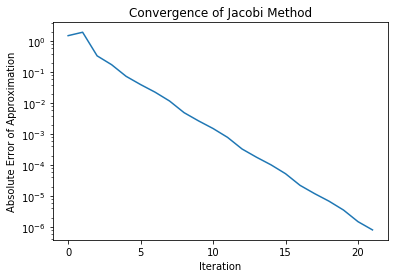

True

In [140]:

x = jacobiIter(A, b, tol = 1e-6,maxiters = 30, plot = True)
np.allclose(A @ x, b)

Problem 3

In [76]:
def GSeidelIter(A, b, tol, maxiters, plot = False):
    x_0 = np.zeros(b.shape)
    x_1 = np.zeros(b.shape)
    D = np.diagonal(A)
    k = 0
    dist = tol + 1
    errors = [np.linalg.norm(b)]
    while k < maxiters and dist > tol:
        xcopy = np.copy(x_0)
        for i in range(len(x_0)):
            xcopy[i] = xcopy[i] + (b[i] - A[i,:] @ xcopy)/D[i]
        x_1 = xcopy
        dist = np.linalg.norm(x_1 - x_0)
        errors.append(np.linalg.norm(A @ x_1 - b))
        x_0 = x_1
        k += 1
    if k < maxiters:
        print('Succesfully converged to ',x_0)
    if plot:
        plt.semilogy(range(k+1),errors)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Gauss-Seidel Method')
        plt.show()
    return x_0

Succesfully converged to  [ 0.15059673  0.29620876  0.0108069  -0.1491303   0.94865982  0.79420317]


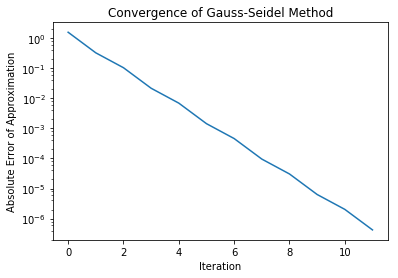

True

In [141]:

x = GSeidelIter(A, b, tol = 1e-6,maxiters = 30, plot = True)
np.allclose(A @ x, b)

In [143]:
from scipy import sparse

In [312]:
def sparseGSeidelIter(A, b, tol, maxiters, omega=1):
    x_0 = np.zeros(b.shape)
    x_1 = np.zeros(b.shape)
    #D = np.diagonal(A)
    k = 0
    dist = tol + 1
    while k < maxiters and dist > tol:
        xcopy = np.copy(x_0)
        for i in range(len(x_0)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend].flatten() @ xcopy[A.indices[rowstart:rowend]]
            #print(np.round(b[i] - Aix))
            
            xcopy[i] = xcopy[i] + (omega/A[i,i]) * (b[i] - Aix)
            #print(np.round(xcopy))
        x_1 = xcopy
        dist = np.linalg.norm(x_1 - x_0)
        x_0 = x_1
        k += 1
    if k < maxiters:
        #print('Succesfully converged to ',x_0)
        return x_0, k
    return x_0, k

In [170]:
A

array([[ 5.,  0.,  1.,  0.,  0.,  0.],
       [-3.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., -2.,  0.,  0.],
       [ 0.,  2.,  0.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0., -2.,  3.]])

In [171]:
b

array([ 0.76379041,  0.73304484,  0.33068091,  0.14502661,  0.94865982,
        0.48528985])

In [172]:
sA = sparse.csr_matrix(A)

In [215]:
sparseGSeidelIter(sA, b, tol = 1e-6, maxiters = 30, omega= 1)

Succesfully converged to  [ 0.15059673  0.29620876  0.0108069  -0.1491303   0.94865982  0.79420317]


(array([ 0.15059673,  0.29620876,  0.0108069 , -0.1491303 ,  0.94865982,
         0.79420317]), 11)

Problem 5

In [218]:
sparseGSeidelIter(sA, b, tol = 1e-6, maxiters = 30, omega= 1.1)

Succesfully converged to  [ 0.15059666  0.29620868  0.01080664 -0.14913023  0.94865982  0.79420317]


(array([ 0.15059666,  0.29620868,  0.01080664, -0.14913023,  0.94865982,
         0.79420317]), 20)

Omega can supposedly sometimes dramatically improve convergence. Emphasis on 'sometimes'.

Problem 6

In [313]:
def funct(n, omega, tol = 1e-8, maxiters = 100, plot = False):
    B = sparse.diags([1,-4,1],[-1,0,1],shape=(n,n))
    A = sparse.block_diag(np.tile(B,n))
    offdiagI = sparse.diags([1,1],[-n,n],shape = (n**2,n**2))
    #print(offdiagI.toarray())
    A = A + offdiagI
    #print(A.toarray())
    
    b = np.zeros(n)
    b[0], b[n -1] = -100, -100
    b = np.tile(b, n)
    
    x, it = sparseGSeidelIter(A,b,tol,maxiters,omega)
    
    if plot:
        u = np.reshape(x,(n,n))
        xcoord = np.linspace(0,n,n+1)
        plt.pcolormesh(xcoord,xcoord,u,cmap='coolwarm')
        plt.colorbar()
        plt.axis('off')
        plt.show()
    return x, it

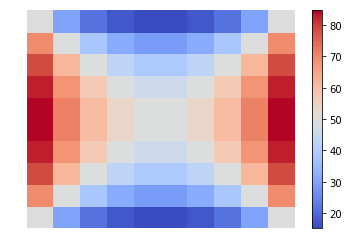

In [302]:
M = funct(10, 1, tol = 1e-8, maxiters = 100, plot = True)

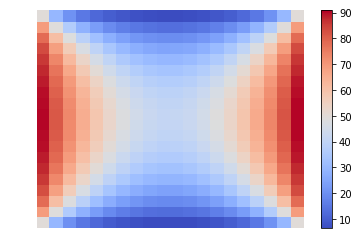

In [304]:
M = funct(20, 1, tol = 1e-8, maxiters = 100, plot = True)

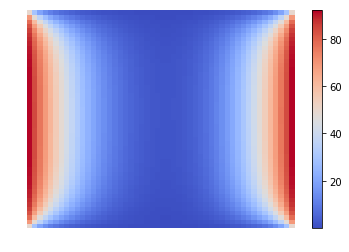

In [305]:
M = funct(50, 1, tol = 1e-8, maxiters = 100, plot = True)

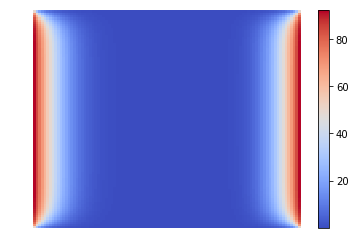

In [301]:
M = funct(100, 1, tol = 1e-8, maxiters = 100, plot = True)

Problem 7

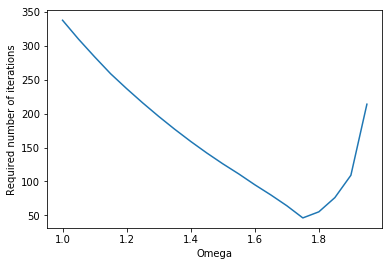

In [315]:
n = 20
tol = 1e-2
maxiters = 1000
omegas = np.linspace(1,1.95,20)
iteration = np.empty_like(omegas)
for i in range(len(omegas)):
    iteration[i] = funct(n, omegas[i], tol = 1e-2,maxiters=1000)[1]
plt.plot(w,iteration)
plt.xlabel('Omega')
plt.ylabel('Required number of iterations')
plt.show()

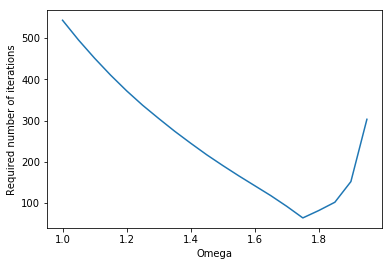

In [317]:
n = 20
tol = 1e-4
maxiters = 1000
omegas = np.linspace(1,1.95,20)
iteration = np.empty_like(omegas)
for i in range(len(omegas)):
    iteration[i] = funct(n, omegas[i], tol = 1e-4,maxiters=1000)[1]
plt.plot(w,iteration)
plt.xlabel('Omega')
plt.ylabel('Required number of iterations')
plt.show()